У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [5]:
df = pd.read_csv('/Users/s1ndly/Data Analytics/data/yulu_rental.csv')

In [6]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

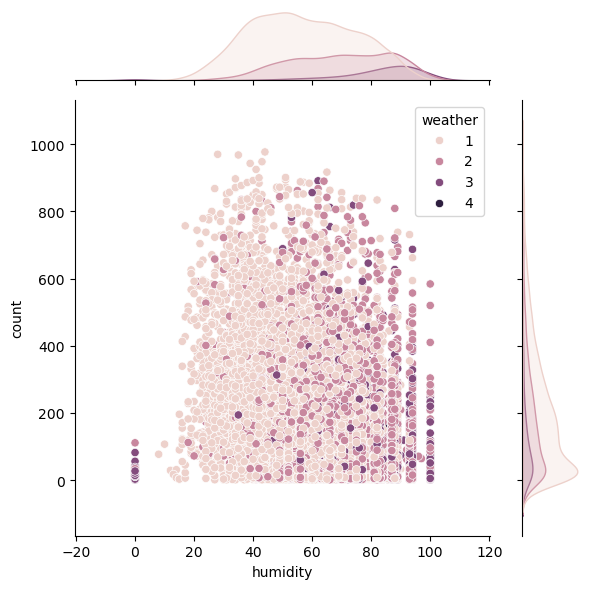

In [9]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather')
plt.tight_layout()
plt.show();

 - Ми можемо спостерігати те, що коли в нас є хорошо погода (1-2), то кількість взятиз в аренду байків зростає (позитивна корреляція).
 - Є певні outliers при humidity(0) & count(0-150), коли погода була не дуже suitable для байкінгу
 - Також в нас є цікава observation, що коли humidity бува 100 у не дуже хорошу погоду (3-4), то байки все-таки рентували. Це могло бути із-за страйків of public transport чи це була якась спортина подія


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

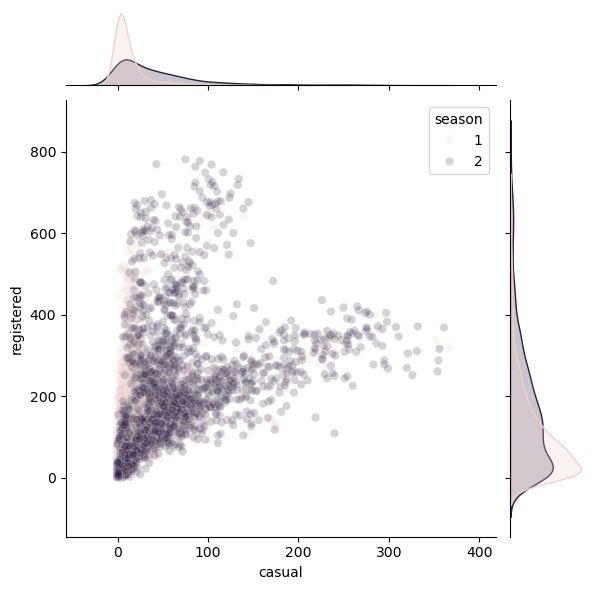

In [25]:
filtered_df = df[(df.season == 1) | (df.season == 2)]

sns.jointplot(filtered_df, x='casual', y='registered', hue='season', alpha=.2);

- Найбільша кількість користувачів спостерігається влітку, причому основну частку становлять зареєстровані користувачі.
- Навесні додатком активно користуються зареєстровані користувачі, що може свідчити про те, що вони є основною аудиторією сервісу. Бізнесу варто зосередитися на їх утриманні за допомогою спеціальних пропозицій (offers).
- На графіку видно, що кількість нових користувачів (casual) зростає до 120 осіб, після чого поступово кількість поїздок зменшується. Це може свідчити про успішну конверсію в зареєстрованих користувачів або про те, що ці юзери припиняють користуватися сервісом.
- Влітку спостерігаються деякі максимальні значення серед casual-користувачів на рівні 350 поїздок, що може бути пов’язано зі святами чи подіями, які позитивно впливають на оренду велосипедів. Таким чином, доцільно впроваджувати промо-акції, щоб залучити більше клієнтів.


Сезонність на цьому графіку відіграє ключову роль у кількості нових поїздок, тому бізнесу варто адаптувати маркетингові стратегії відповідно до цього фактора. Також помітно, що зареєстровані користувачі оформлюють більше поїздок, тоді як зростання кількості нових користувачів сповільнюється. Отже, слід переглянути стратегії залучення нових клієнтів, проаналізувати їхню поведінку (чи залишаються вони після першої поїздки, яка частота їхніх замовлень, у яких районах вони активні та як їх оцінюють).

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


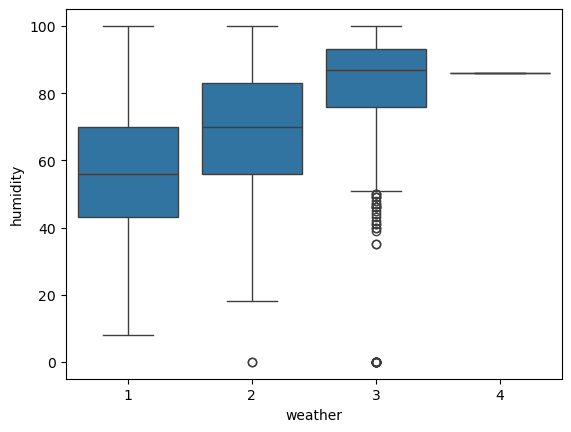

In [28]:
sns.boxplot(data=df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


In [29]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [44]:
df_pairplot = df[['casual', 'registered', 'count', 'workingday']]

''

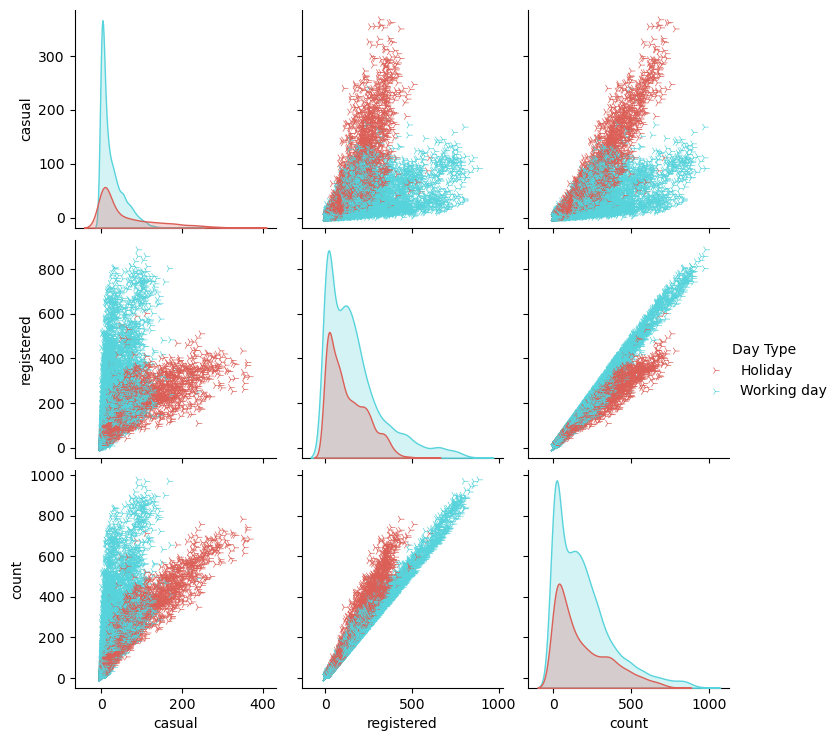

In [57]:
pairplot_t4 = sns.pairplot(df_pairplot, vars=['casual', 'registered', 'count'],  hue='workingday', markers='4', palette='hls')
pairplot_t4._legend.set_title('Day Type')
pairplot_t4._legend.texts[0].set_text('Holiday')
pairplot_t4._legend.texts[1].set_text('Working day')
;

На графіку у зареєстрованих користувачів у робочі дні спостерігається більш сильна позитивна кореляція, в той час, як у святкові дні кореляція, хоча і є, але вона більш хаотична. Це свідчить про те, що зареєстровані користувачі можуть користуватися додатком на більш постійній основі завдяки якимось акціям у будні дні.

Випадкова тенденція кількості нових клієнтів збільшується більше під час вихідних/свят, ніж у робочі дні.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [66]:
df['datetime'] = pd.to_datetime(df.datetime)

In [70]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_n,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01


 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [67]:
df['date'] = df.datetime.dt.date

In [68]:
df_viz = df[['date', 'registered', 'casual']]

In [89]:
df_viz_date = df_viz.groupby('date', as_index=False).sum()

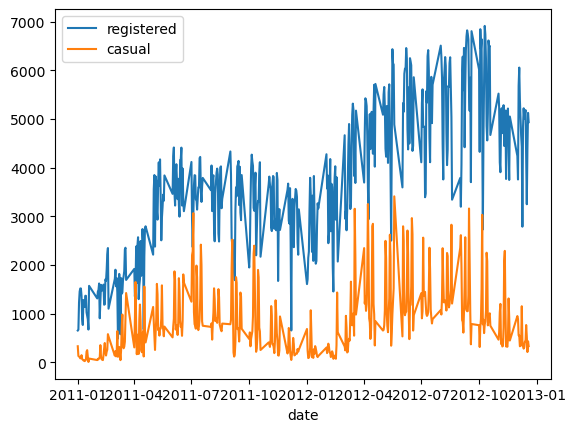

In [91]:

plt.plot(df_viz_date['date'], df_viz_date['registered'], label='registered')
plt.plot(df_viz_date['date'], df_viz_date['casual'], label='casual')
plt.xlabel('date')
plt.legend()
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
